# Pima Indian Diabetes
Predict the onset of disbetes based on the diagnostic measure
### Table of contents
1. Import libraries
2. Load the data
3. Data Analysis
4. Data visualization
5. Data Preprocessing
6. Model training and evaluation
7. Model Results

# 1. Import library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier


# 2.  Load Data
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.

###  Data Description :
Data set contain 9 feature from which 8 are independent and one is dependent feature . Now We will predict the 
diabetes based on these independent feature and predict the diabetes for the target feature.


In [4]:
data=pd.read_csv('diabetes.csv')


# 3.  Data analysis
I this section ,I will do the following concepts:
* Head of the data
* check number of rows and columns of the data
* check the data types 
* check the describe such as count, min , max , q1, q2, q3 and so on
* check correlation of the feature with the target variable

#### check the head of the data


In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### check the number of rows and columns in the dataset


In [6]:
print("Number of rows : {} and columns : {}  in the dataset.".format(data.shape[0], data.shape[1]))

Number of rows : 768 and columns : 9  in the dataset.


#### Data types of the dataset

In [9]:
data.info()
#### There is no missing value in the dataset and all columns are numeric 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### DEscribe data

In [10]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### check correlation of each attribute with target variable


In [12]:
corr=data.corr()
corr['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

# 4. Data visualization

#### Chck distribution of each feature

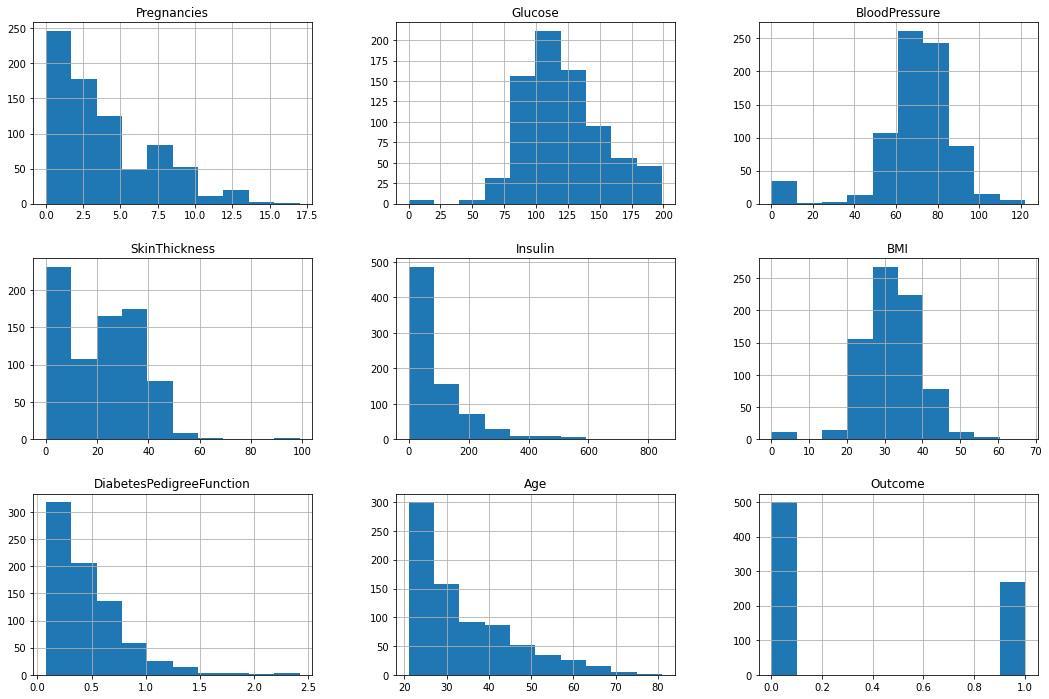

In [14]:
data.hist(figsize=(18,12))
plt.show()

### check correlation of each variable using the heatmap plot 

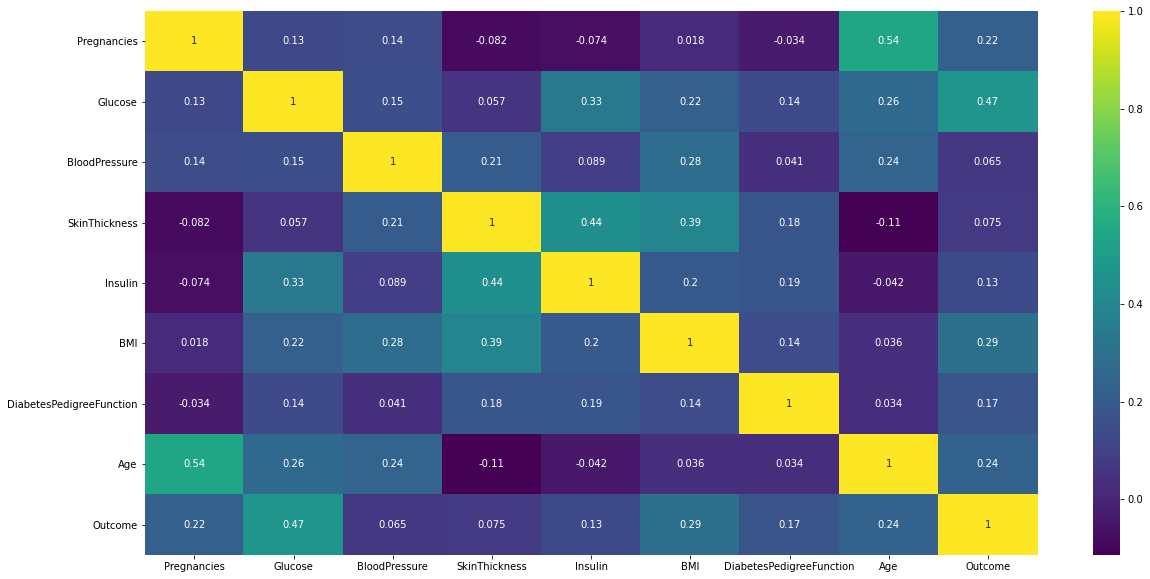

In [15]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, cmap='viridis')
plt.show()

# 5. Data Preprocessing
#### Define input varibale X adn target variable Y

In [16]:
X=data.drop('Outcome', axis=1)
Y=data['Outcome']

### Normalize data using standardScaler

In [17]:
scaler=StandardScaler()
X=scaler.fit_transform(X)


#### split the data into train and test data

In [18]:
X_train ,X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.30, random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((537, 8), (231, 8), (537,), (231,))

# 6. Model training and Evaluation
In this section, I will do the following model:
* Logisticregression
* KNN
* SVM
* Decision Tree

In [23]:
results=pd.DataFrame({'model':[], 'accuracy_score': []})

In [24]:
models=[]
models.append(('LogisticRegression', LogisticRegression(solver='lbfgs')))
models.append(('SVM', SVC(kernel='rbf', gamma='auto')))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))


In [25]:
# train and evaluate each model using accuracy_score

for name, model in models:
    model.fit(X_train, Y_train)
    preds = model.predict(X_test)
    score = accuracy_score(Y_test, preds)
    temp_results = pd.DataFrame({'model':[name],'accuracy_score': [score]})
    results = pd.concat([results, temp_results], axis=0)
    print("%s: %f" % (name, score))

LogisticRegression: 0.735931
SVM: 0.748918
DecisionTreeClassifier: 0.683983
KNN: 0.692641


# Hyperparameters tuning using gridsearchcv

In [26]:
C=np.array([1,2,3,4,5,6,7])
kernel=('linear','rbf')
param_grid={'kernel':kernel,'C':C}
svc=SVC(gamma='auto')
grid=GridSearchCV(estimator=svc,param_grid=param_grid, cv=5)
grid.fit(X_train ,Y_train)
print("Best Score: %f using %s" % (grid.best_score_, grid.best_params_))
means = grid.cv_results_['mean_test_score']
params = grid.cv_results_['params']

for mean, param in zip(means, params):
    print("Score: %f using %s" % (mean, param))
    
# add the best score to results dataframe
results.loc[results['model'] == 'SVC', 'accuracy_score'] = grid.best_score_

Best Score: 0.783922 using {'C': 1, 'kernel': 'linear'}
Score: 0.783922 using {'C': 1, 'kernel': 'linear'}
Score: 0.769020 using {'C': 1, 'kernel': 'rbf'}
Score: 0.783922 using {'C': 2, 'kernel': 'linear'}
Score: 0.765265 using {'C': 2, 'kernel': 'rbf'}
Score: 0.783922 using {'C': 3, 'kernel': 'linear'}
Score: 0.769038 using {'C': 3, 'kernel': 'rbf'}
Score: 0.782053 using {'C': 4, 'kernel': 'linear'}
Score: 0.765282 using {'C': 4, 'kernel': 'rbf'}
Score: 0.783922 using {'C': 5, 'kernel': 'linear'}
Score: 0.763430 using {'C': 5, 'kernel': 'rbf'}
Score: 0.782053 using {'C': 6, 'kernel': 'linear'}
Score: 0.763413 using {'C': 6, 'kernel': 'rbf'}
Score: 0.782053 using {'C': 7, 'kernel': 'linear'}
Score: 0.761509 using {'C': 7, 'kernel': 'rbf'}


In [27]:
k_values = np.array([1,3,5,7,9,11,13,15])
param_grid = dict(n_neighbors=k_values)
knn = KNeighborsClassifier()
grid = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, iid=True)
grid.fit(X_train,Y_train)
print("Best Score: %f using %s" % (grid.best_score_, grid.best_params_))

means = grid.cv_results_['mean_test_score']
params = grid.cv_results_['params']

for mean, param in zip(means, params):
    print("Score: %f using %s" % (mean, param))
    
# add the best score to results dataframe
results.loc[results['model'] == 'KNN', 'accuracy_score'] = grid.best_score_

Best Score: 0.770950 using {'n_neighbors': 7}
Score: 0.722533 using {'n_neighbors': 1}
Score: 0.744879 using {'n_neighbors': 3}
Score: 0.757914 using {'n_neighbors': 5}
Score: 0.770950 using {'n_neighbors': 7}
Score: 0.767225 using {'n_neighbors': 9}
Score: 0.767225 using {'n_neighbors': 11}
Score: 0.756052 using {'n_neighbors': 13}
Score: 0.754190 using {'n_neighbors': 15}


# LogisticRegression

In [28]:
C = np.array([1,2,3,4,5,6,7,8,9,10])
param_grid = {'C': C}
lr = LogisticRegression(solver='lbfgs')
grid = GridSearchCV(estimator=lr,param_grid=param_grid,cv=5, iid=True)
grid.fit(X_train,Y_train)
print("Best Score: %f using %s." % (grid.best_score_, grid.best_params_))

means = grid.cv_results_['mean_test_score']
params = grid.cv_results_['params']

for mean, param in zip(means, params):
    print("Score: %f using %s" % (mean, param))
    
# add the best score to results dataframe
results.loc[results['model'] == 'logistic_regression', 'accuracy_score'] = grid.best_score_

Best Score: 0.774674 using {'C': 1}.
Score: 0.774674 using {'C': 1}
Score: 0.774674 using {'C': 2}
Score: 0.774674 using {'C': 3}
Score: 0.774674 using {'C': 4}
Score: 0.774674 using {'C': 5}
Score: 0.774674 using {'C': 6}
Score: 0.774674 using {'C': 7}
Score: 0.774674 using {'C': 8}
Score: 0.774674 using {'C': 9}
Score: 0.774674 using {'C': 10}


In [29]:
# create instances of ensemble methods
ensembles = []
ensembles.append(('RandomForest', RandomForestClassifier(n_estimators=100)))
ensembles.append(('GradientDescent', GradientBoostingClassifier(learning_rate=0.1, n_estimators=100)))
lr = LogisticRegression(C=3,solver='lbfgs')
ensembles.append(('AdaBoost', AdaBoostClassifier(base_estimator=lr,n_estimators=100, algorithm='SAMME.R')))

In [30]:
# train and evaluate ensemble methods
for name, model in ensembles:
    model.fit(X_train, Y_train)
    preds = model.predict(X_test)
    score = accuracy_score(Y_test, preds)
    temp_results = pd.DataFrame({'model':[name], 'accuracy_score': [score]}) # create temporary dataframe
    results = pd.concat([results, temp_results], axis=0) # append the values to results dataframe
    print("%s: %f" % (name, score))

RandomForest: 0.727273
GradientDescent: 0.744589
AdaBoost: 0.701299


# 7. Final result

In [31]:
results.reset_index(drop=True, inplace=True)
results

,model,accuracy_score
0,LogisticRegression,0.735931
1,SVM,0.748918
2,DecisionTreeClassifier,0.683983
3,KNN,0.770950
4,RandomForest,0.727273
5,GradientDescent,0.744589
6,AdaBoost,0.701299
